## Stanford University Summer 2024
## DataSci 112: Principles of Data Science

# Lab 6


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_predict

In [ ]:
filename = "http://www.csc.calpoly.edu/~dekhtyar/301-Winter2024/data/marketing_campaign.csv"

df = pd.read_csv(filename, delimiter = "\t")
df  = df.set_index("ID")

In [ ]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Dataset Description

This [dataset is available on Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

The dataset documents customer profiles for a set of 2240 customers of a company. The dataset has been constructed for the use by the company's marketing department, and of primary interest to the company here is the customer segmentation (in other words, clustering of customers into different groups).  We, however, will use this dataset for several other purposes.


**Attributes**

**People**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response:` 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

## Part 1. Exploratory Analysis and Feature Engineering.

The distribution of the customers’ birth year is shown below with its mean and standard deviation.

In [ ]:
def compute_histogram(df, s, color, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.hist(df[s], bins=10, edgecolor=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [ ]:
data_year = pd.DataFrame(df['Year_Birth'])
birth_years = np.array(data_year['Year_Birth']).reshape(-1, 1)
scaler = StandardScaler()
scaled_birth_years = scaler.fit_transform(birth_years)
mean = scaler.mean_[0]
std = np.sqrt(scaler.var_[0])
print(f'mean is {mean}')
print(f'standard deviation is {std}')

mean is 1968.8058035714287
standard deviation is 11.981394142764563


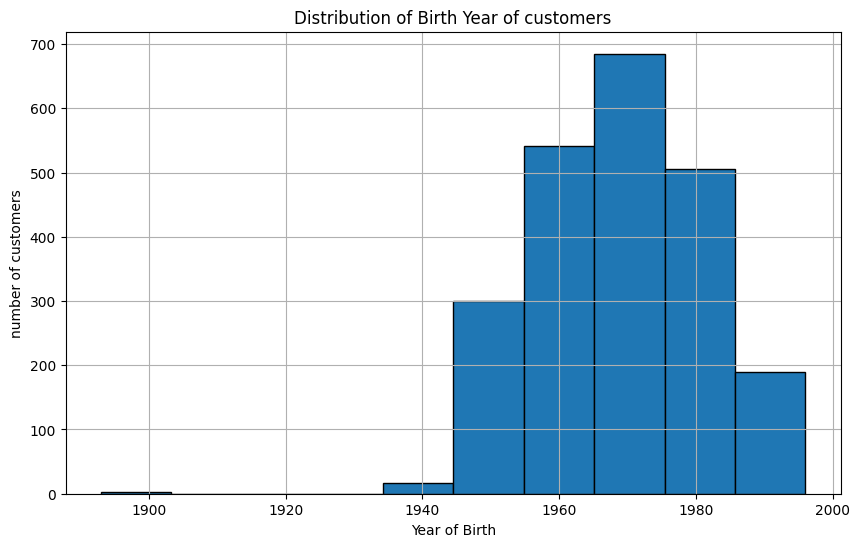

In [ ]:
# Plotting the distribution
compute_histogram(df, 'Year_Birth', 'black',
                  'Distribution of Birth Year of customers', 'Year of Birth',
                  'number of customers')

Most of the customers were born between 1960 and 1980, indicating that the company’s customer base is primarily middle-aged to older adults with relatively stable income and purchasing power.

The income distribution is shown below:

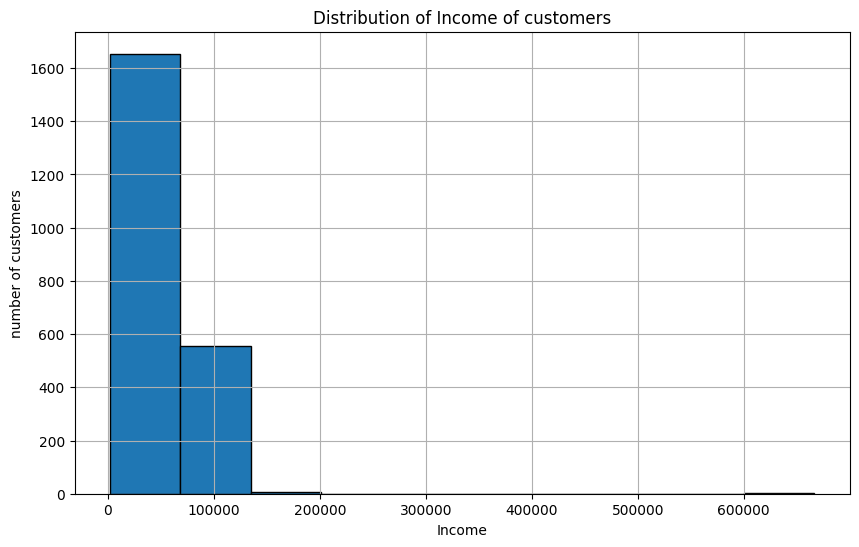

In [ ]:
compute_histogram(df, 'Income', 'black',
                  'Distribution of Income of customers', 'Income',
                  'number of customers')

Eliminate the outliers:

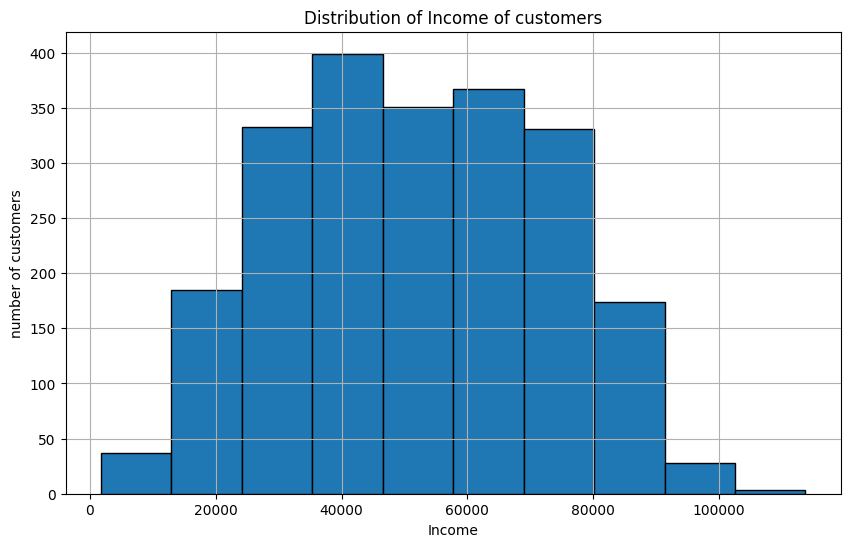

In [ ]:
data_income = pd.DataFrame(df['Income'])
filtered_data_income = data_income[data_income['Income'] < 130000]
filtered_df = pd.DataFrame(filtered_data_income)
compute_histogram(filtered_df, 'Income', 'black',
                  'Distribution of Income of customers', 'Income',
                  'number of customers')

Most customers have a household income in the range of 3,000 to 8,000, which represents the company’s core customer base.

Split the income group into 4 categories: lower income, lower-mid income, upper-mid income, uppper income. Lower income can be less than the 25% of the income range, lower-mid income is 25% to 50% of the income range, upper-mid income is above the 50% but less than 75% of the income range, and the upper income is above 75% of the income range.

In [ ]:
def categorize_income(income):
    if income < df['Income'].quantile(0.25):
      return 'Low income'
    elif income < df['Income'].quantile(0.50):
      return 'Lower-mid income'
    elif income < df['Income'].quantile(0.75):
      return 'Upper-mid income'
    else:
      return 'Upper income'

In [ ]:
df['IncomeBin'] = df['Income'].apply(categorize_income)

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeBin
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,Upper-mid income
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,Lower-mid income
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,Upper income
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,Low income
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,Upper-mid income


Percentage of people accepted offers in each of the campaign is shown below

In [ ]:
data = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5']]
percentage = (data.mean() * 100).round(2)
print(percentage)

AcceptedCmp1    6.43
AcceptedCmp2    1.34
AcceptedCmp3    7.28
AcceptedCmp4    7.46
AcceptedCmp5    7.28
dtype: float64


The most successful campaign is 7.46 and the least successful campaign is 1.34. This shows that some campaigns were much more effective than others.

Create a new attribute `AcceptedCmp` which is set to `1` if the customer accepted at least one offer and to `0` otherwise. Create a bar chart showing the percentage of the customers who accepted at least one campaign offer.

In [ ]:
df['AcceptedCmp'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                  'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0).astype(int)


In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeBin,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,3,11,1,Upper-mid income,0
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,3,11,0,Lower-mid income,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,3,11,0,Upper income,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,3,11,0,Low income,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,3,11,0,Upper-mid income,0


In [ ]:
accepted_percentage = (df['AcceptedCmp'].mean() * 100).round(2)
print(f'{accepted_percentage}%')

20.67%


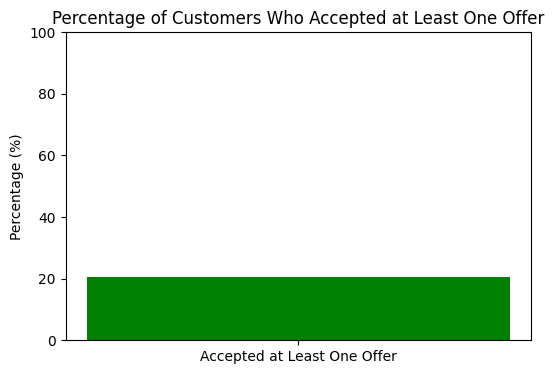

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Accepted at Least One Offer'], [accepted_percentage], color='green')
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.title('Percentage of Customers Who Accepted at Least One Offer')
plt.show()

The crosstabs between people who accepted at least one campaign offer and people who filed at least one complaint with the company is shown.

In [ ]:
crosstab = pd.crosstab(df['AcceptedCmp'], df['Complain'], margins=True)
crosstab

Complain,0,1,All
AcceptedCmp,,,
0,1758,19,1777
1,461,2,463
All,2219,21,2240


There are 21 people who complained, of them, only 2 made purchases using a promotion. This suggests that dissatisfied customers are much less likely to respond to promotional campaigns.

Create a new feature, `Purchases` that combines together the number of purchases on the web, through the catalog and in store. The distribution is shown


In [ ]:
df['Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df[
    'NumStorePurchases']

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeBin,AcceptedCmp,Purchases
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,3,11,1,Upper-mid income,0,22
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,3,11,0,Lower-mid income,0,4
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,3,11,0,Upper income,0,20
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,3,11,0,Low income,0,6
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,3,11,0,Upper-mid income,0,14


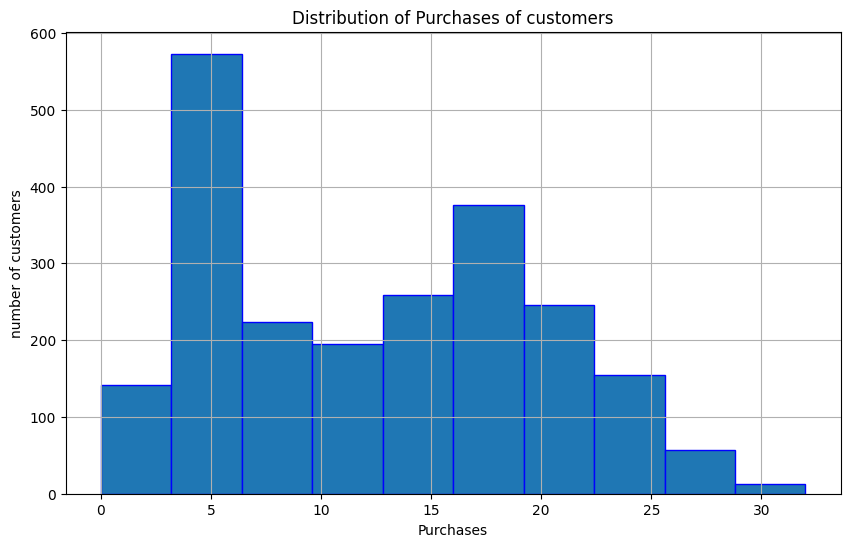

In [ ]:
compute_histogram(df, 'Purchases', 'blue',
                  'Distribution of Purchases of customers', 'Purchases',
                  'number of customers')

Create a visualization that shows all of the following information in a single plot:

 * customer year of birth
 * customer income
 * customer marital status
 * number of purchases a customer made with the company.




In [ ]:
def plot_res(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


<ipython-input-115-318377386bde>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Marital_Status'] = filtered_df['Marital_Status'].map(


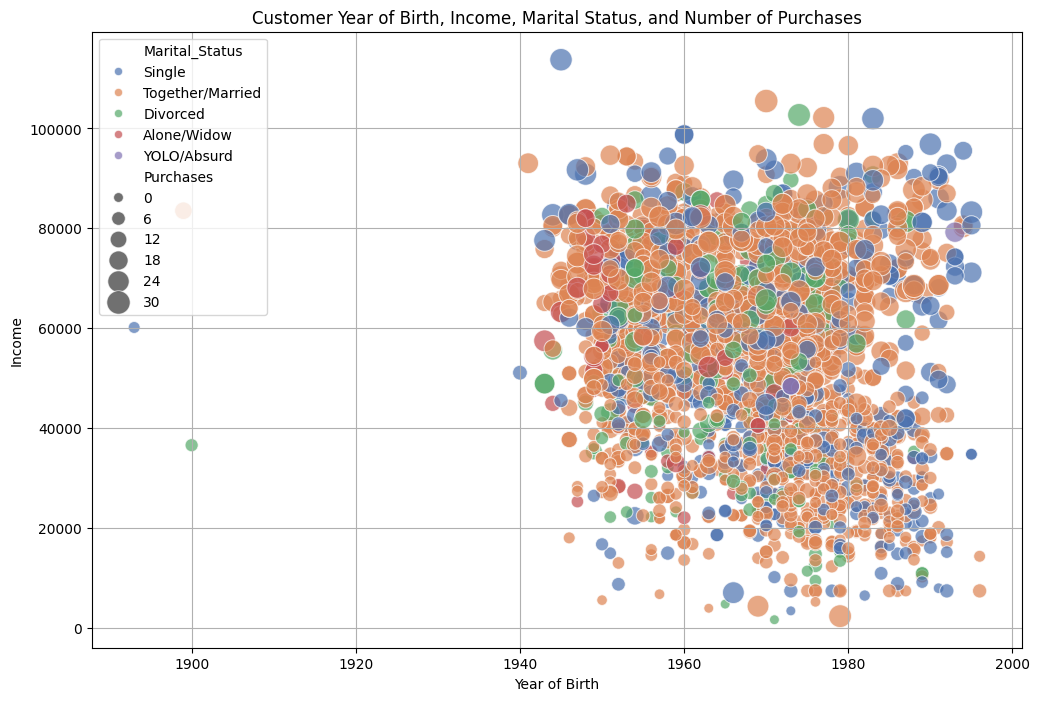

In [ ]:
filtered_df = df.iloc[:150]
filtered_df = df[(df['Income'] <= 130000)]
marital_status_mapping = {
    'Married': 'Together/Married',
    'Together': 'Together/Married',
    'Alone': 'Alone/Widow',
    'Widow': 'Alone/Widow',
    'Single': 'Single',
    'Divorced': 'Divorced',
    'Absurd' : 'YOLO/Absurd',
    'YOLO' : 'YOLO/Absurd'
}
filtered_df['Marital_Status'] = filtered_df['Marital_Status'].map(
    marital_status_mapping)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year_Birth', y='Income', hue='Marital_Status',
                size='Purchases', sizes=(50, 300), data=filtered_df, palette='deep',
                alpha=0.7)
plot_res('Customer Year of Birth, Income, Marital Status, and Number of Purchases',
     'Year of Birth', 'Income')

## Part 2. Regression

Determine if there is a sufficiently strong relationship between the birth year (i.e., age) of a customer, and their current income.

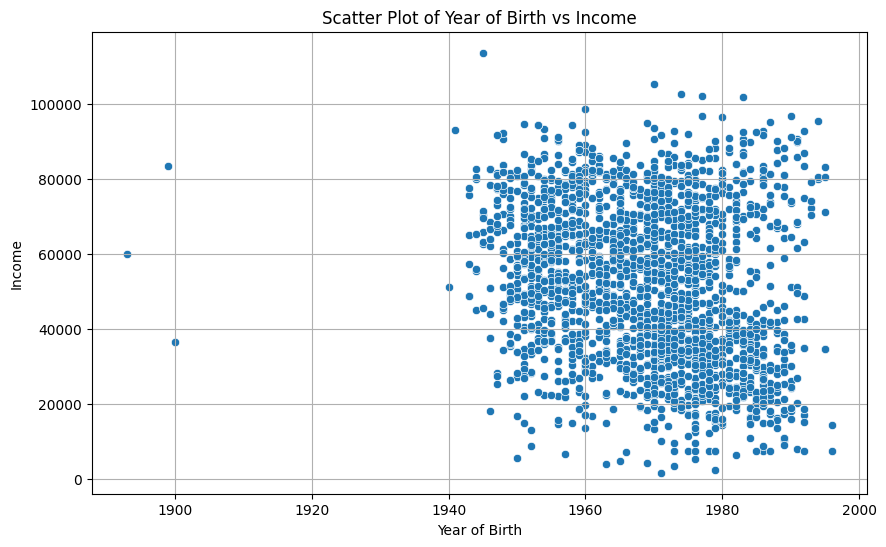

In [ ]:

df_drop_null = df.dropna(subset=['Income'])
df_drop_null = df_drop_null[(df_drop_null['Income'] <= 130000)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_Birth', y='Income', data=df_drop_null)
plot_res('Scatter Plot of Year of Birth vs Income', 'Year of Birth', 'Income')

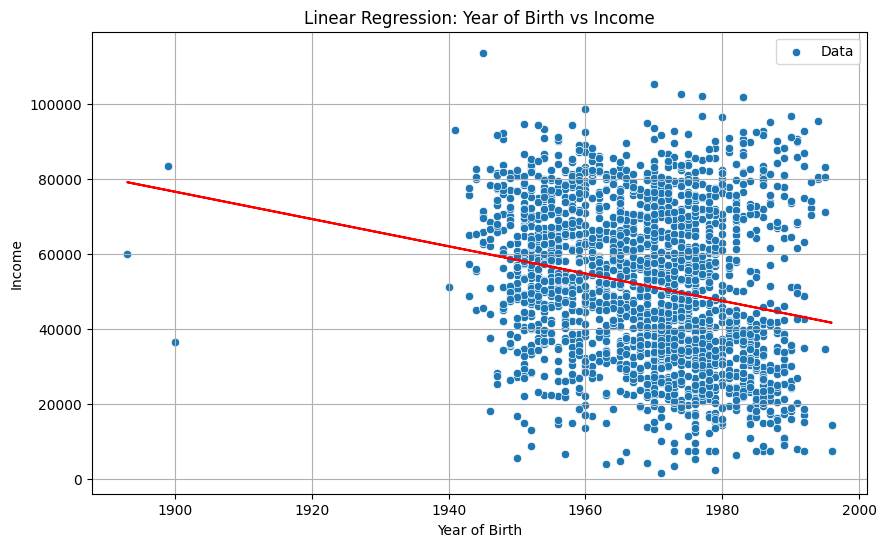

In [ ]:

X = df_drop_null['Year_Birth'].values.reshape(-1, 1)
y = df_drop_null['Income'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year_Birth', y='Income', data=df_drop_null, label='Data')
plt.plot(df_drop_null['Year_Birth'], y_pred, color='red', label='Regression Line')
plot_res('Linear Regression: Year of Birth vs Income', 'Year of Birth', 'Income')

In [ ]:

slope = model.coef_[0]

print(f"Slope: {slope}")

Slope: -363.82301140700565


the coefficient is negative, it means when the user was born recently, which means they are younger, their income is lower. So the line is in a decrease trending.

In [ ]:

train_df = df[:2000]
valid_df = df[2000:]

train_df = train_df.dropna()
valid_df = valid_df.dropna()

X_train = train_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
y_train = train_df['Income']
X_valid = valid_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
y_valid = valid_df['Income']

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

In [ ]:
def compute_metrics(y, y_pred, s):
    mse_train = mean_squared_error(y, y_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y, y_pred)

    print(f"{s}-------")
    print(f"MSE: {mse_train}")
    print(f"RMSE: {rmse_train}")
    print(f"MAE: {mae_train}")

In [ ]:

compute_metrics(y_train, y_train_pred, 'training metrics')
compute_metrics(y_valid, y_valid_pred, 'validating metrics')

training metrics-------
MSE: 166698031.5708294
RMSE: 12911.15918772708
MAE: 9444.678446479165
validating metrics-------
MSE: 1896812721.5452647
RMSE: 43552.41349851079
MAE: 12360.481829395661


add the birth year, marital status and educational background into the mix.  Create the appropriate features, and find the training and test accuracy based on the same train-validation split as previous

In [ ]:

train_df = df[:2000]
valid_df = df[2000:]

train_df = train_df.dropna()
valid_df = valid_df.dropna()
X_train = train_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'Education', 'Year_Birth', 'Marital_Status']]

y_train = train_df['Income']
X_valid = valid_df[['MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'Education', 'Year_Birth', 'Marital_Status']]

y_valid = valid_df['Income']
categorical_features = ['Education', 'Marital_Status']
numerical_features = ['MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'Year_Birth']

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         categorical_features)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_valid_pred = pipeline.predict(X_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:

compute_metrics(y_train, y_train_pred, 'training metrics')
compute_metrics(y_valid, y_valid_pred, 'validating metrics')

training metrics-------
MSE: 154237633.12757677
RMSE: 12419.244466857746
MAE: 8936.648638941604
validating metrics-------
MSE: 1874662099.5476935
RMSE: 43297.36827507757
MAE: 11406.890186535516


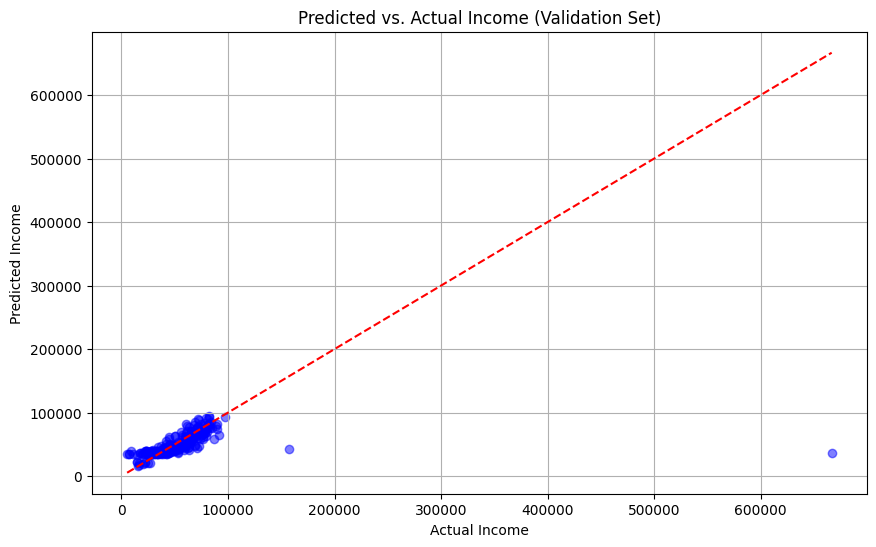

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_valid_pred, alpha=0.5, color='blue',
            label='Validation Data')
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)],
         color='red', linestyle='--', label='y=x line')
plot_res('Predicted vs. Actual Income (Validation Set)', 'Actual Income',
         'Predicted Income')

For the low and extremely high income customers, the model is hard to predict

## Part 3. Classification

Predict if the customer accepted the offer in the last campaign (variable named `Response`) based on whether they accepted the offers in any of the previous campaigns, and the total number of discounted purchases they made.  Use **Logistic Regression** classifier with default parameters. Do an 80-20 train-validation split (random), and report both the training and validation accuracy, together with the
training and validation confusion matrices.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:

X = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
        'AcceptedCmp5', 'NumDealsPurchases']]
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


In [ ]:

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {test_accuracy}")

print("\nTraining Confusion Matrix:")
print(train_conf_matrix)

print("\nTesting Confusion Matrix:")
print(test_conf_matrix)

Training Accuracy: 0.8727678571428571
Validation Accuracy: 0.8459821428571429

Training Confusion Matrix:
[[1506   21]
 [ 207   58]]

Testing Confusion Matrix:
[[368  11]
 [ 58  11]]


Accuracy alone is not always a good metric since if the dataset is imbalance, it can be hard to decide if the model is accurate. It is better to add precission, reacll or F1 scores.

predict the same variable (`Response`) but base it on the `Mnt` variables (amount of money spent on different categories of products) plus the *Place* variables (number of purchases made via web, catalog, or in store, and number of  web site visits).  Use `KNeighbors` classifier  and do a grid search for the number of neighbors and the distance metric, using 5-fold cross-validation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
y = df['Response']
knn = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': range(1, 12),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scorer, return_train_score=True)
grid_search.fit(X, y)
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 10}
Best cross-validation accuracy: 0.85


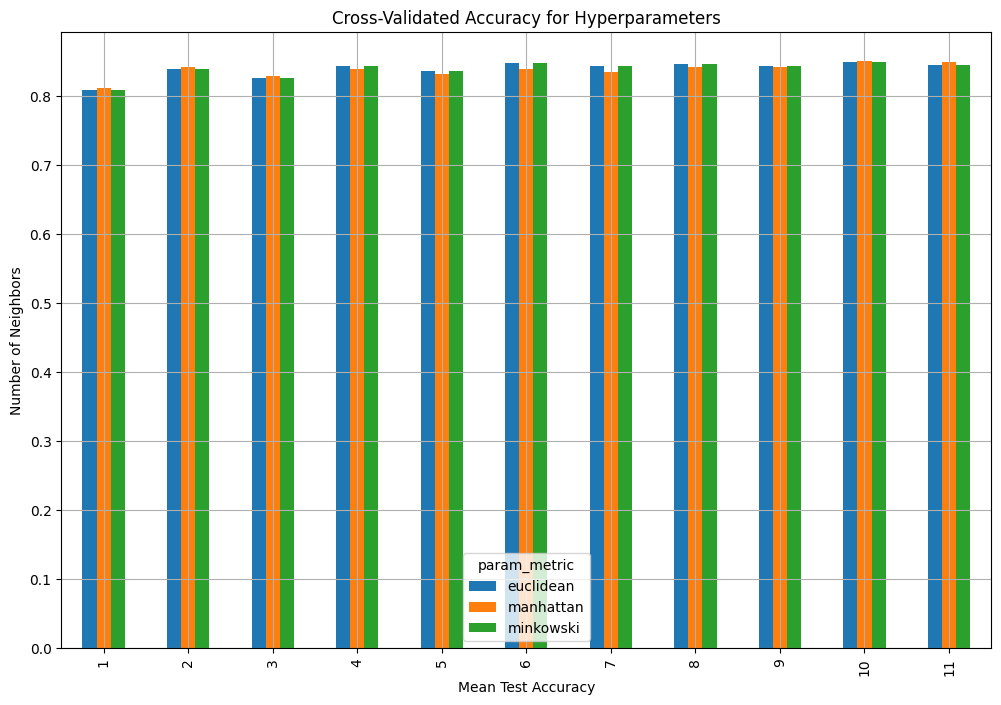

In [ ]:
pivot_table = results.pivot(index='param_n_neighbors', columns='param_metric',
                            values='mean_test_score')
pivot_table.plot(kind='bar', figsize=(12, 8))
plot_res('Cross-Validated Accuracy for Hyperparameters',
         'Mean Test Accuracy', 'Number of Neighbors')

In [ ]:
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix for the Best Model:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix for the Best Model:
[[1880   26]
 [ 310   24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1906
           1       0.48      0.07      0.12       334

    accuracy                           0.85      2240
   macro avg       0.67      0.53      0.52      2240
weighted avg       0.80      0.85      0.80      2240



The second set of features' classification report can tell more information, but the accuracy are pretty similar. I don't think it is too much easier to predict the Response varibale.

## Part 4. Clustering

Use the `Mnt` (amount of money spent on various types of products) variables to cluster the customers using `K-means` into four (4) clusters.


In [ ]:

from sklearn.cluster import KMeans
df_filtered = df[df['Income'] <= 130000]
mnt_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds']
X = df_filtered[mnt_variables]

birth_year_income = df_filtered[['Year_Birth', 'Income']]

In [ ]:
k_means = KMeans(n_clusters=4, init='random', n_init = 1, random_state=100)
clusters_without_scaling = k_means.fit_predict(X)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k_means_scaled = KMeans(n_clusters=4, random_state=42)
clusters_scaled = k_means_scaled.fit_predict(X_scaled)

df_filtered['Cluster_without_Scaling'] = clusters_without_scaling
df_filtered['Cluster_Scaled'] = clusters_scaled
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-139-65bfc8488c8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster_without_Scaling'] = clusters_without_scaling
<ipython-input-139-65bfc8488c8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtere

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IncomeBin,AcceptedCmp,Purchases
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,3,11,1,Upper-mid income,0,22
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,3,11,0,Lower-mid income,0,4
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,3,11,0,Upper income,0,20
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,3,11,0,Low income,0,6
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,3,11,0,Upper-mid income,0,14


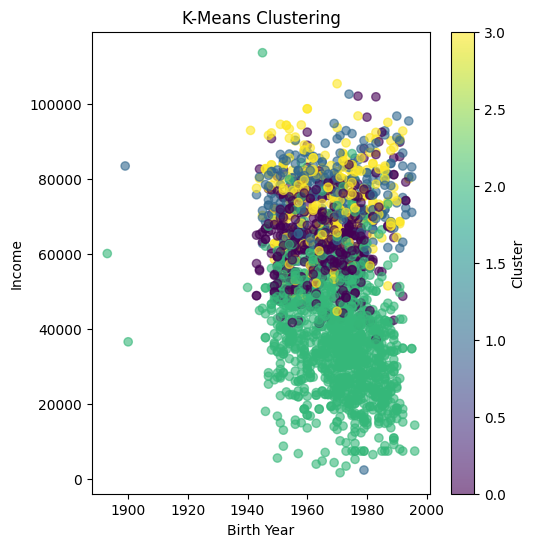

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['Year_Birth'], df_filtered['Income'],
            c=df_filtered['Cluster_without_Scaling'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Birth Year')
plt.ylabel('Income')
plt.colorbar(label='Cluster')

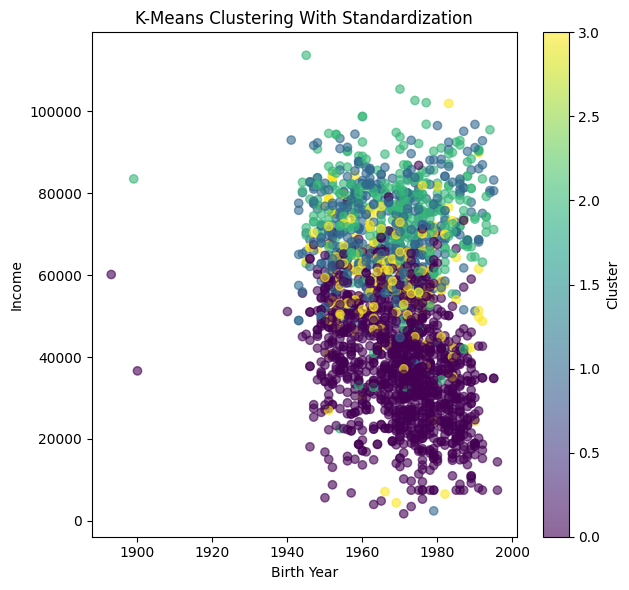

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['Year_Birth'], df_filtered['Income'],
            c=df_filtered['Cluster_Scaled'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering With Standardization')
plt.xlabel('Birth Year')
plt.ylabel('Income')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

One cluster is low-spenders. Two clusters are high-spenders with different spending distribution (one values meat over wine, the other - wine over meat). The remaining cluster are people who spend much more on wine than on other categories.